In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This dataset is obtained from [Kaggle](https://www.kaggle.com/competitions/sa-customer-segmentation/data).

In [2]:
# Load the data
df = pd.read_csv('flight.csv')

# Check top 5 rows
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

In [3]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

__Columns Description__:

Basic customer information:
- `MEMBER_NO`: Membership card number (ID)
- `FFP_DATE`: Membership join date
- `FIRST_FLIGHT_DATE`: First flight date
- `GENDER`: Gender
- `FFP_TIER`: Membership card level
- `WORK_CITY`: The city where the customer works
- `WORK_PROVINCE`: The province where the customer works
- `WORK_COUNTRY`: The country where the customer works
- `AGE`: Age

Flight information:
- `LOAD_TIME`: The end time of the observation window (observation window: time period of observation)
- `FLIGHT_COUNT`: Number of flights in the observation window 
- `SUM_YR_1` : Fare revenue
- `SUM_YR_2` : Votes prices
- `SEG_KM_SUM`: Total flight kilometers in the observation window
- `LAST_FLIGHT_DATE`: Last flight date
- `LAST_TO_END`: The time from the last flight to the end of the observation window
- `AVG_INTERVAL`: Average flight time interval
- `MAX_INTERVAL`: Maximum flight interval
- `avg_discount`: Average discount rate

Integral information
- `BP_SUM`: Total basic integral
- `EXCHANGE_COUNT`: Number of points exchanged
- `Points_Sum`: Total cumulative points
- `Point_NotFlight`: points not used by the customer

# 1. Data Preprocessing

First, let us check how many missing values there are in every column.

### Missing Values 

In [4]:
# Columns that have missing values (in percentage)
null_sum = df.isna().sum()
df_null = pd.DataFrame()
df_null['columns'] = null_sum[null_sum>0].index
df_null['missing values'] = null_sum[null_sum>0].values
df_null['pct'] = round(df_null['missing values']/len(df)*100,3)
df_null.sort_values(by='pct',ascending=False).reset_index(drop=True)

columns  missing values    pct
0  WORK_PROVINCE            3248  5.157
1      WORK_CITY            2269  3.602
2       SUM_YR_1             551  0.875
3            AGE             420  0.667
4       SUM_YR_2             138  0.219
5   WORK_COUNTRY              26  0.041
6         GENDER               3  0.005

In [5]:
# Total number of rows that contain missing values (in percentage)
df_nan = df[df.isna().any(axis=1)]
len(df_nan)/len(df)*100

7.514129675493744

Most missing values come from `WORK_PROVINCE` and `WORK_CITY`. Since the total missing values are less than 10% of the whole dataset, we can safely drop these records altogether without significantly affecting the analysis.

In [6]:
# Drop rows that contain missing values
df.dropna(inplace=True)

In [7]:
# Sanity check
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Duplicated Rows 

In [8]:
# Check the number of duplicated rows
df.duplicated().sum()

0

There are no duplicated rows.

### Standard Cleaning

Next, we will clean the data according to the standard procedure for aviation dataset (Tao, 2020). We will remove the following records:

1. Records where either one of the ticket prices (`SUM_YR_1`,`SUM_YR_2`) contain null values or 0; __OR__
2. Records where the average discount (`avg_discount`) __and__ the total mileage (`SEG_KM_SUM`) are not zero.

In [9]:
# 1st criteria: fare prices are not zero
crit_1 = (df['SUM_YR_1']!=0)|(df['SUM_YR_2']!=0)
# 2nd criteria: average discount and total mileage are 0
crit_2 = (df['avg_discount']==0)&(df['SEG_KM_SUM']==0)

# Grab all rows that meet any of those criteria
df[(crit_1|crit_2)]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER     WORK_CITY  \
0          54993  11/2/2006        12/24/2008    Male         6             .   
2          55106   2/1/2007         8/30/2007    Male         6             .   
3          21189  8/22/2008         8/23/2008    Male         5   Los Angeles   
4          39546  4/10/2009         4/15/2009    Male         6       guiyang   
5          56972  2/10/2008         9/29/2009    Male         6     guangzhou   
...          ...        ...               ...     ...       ...           ...   
62971      45524  2/12/2013          4/3/2013  Female         4     guangzhou   
62972        197  1/14/2011         9/26/2013    Male         4  guangzhoushi   
62973       7445  3/29/2013          4/6/2013    Male         4     guangzhou   
62976      10380   7/8/2010         6/21/2011    Male         4    guiyangshi   
62978      22761  4/14/2011         4/14/2011    Male         4       shantou   

        WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  \
0             beijing           CN  31.0  3/31/2014  ...  234188.0   
2             beijing           CN  40.0  3/31/2014  ...  164982.0   
3                  CA           US  64.0  3/31/2014  ...  125500.0   
4             guizhou           CN  48.0  3/31/2014  ...  130702.0   
5           guangdong           CN  64.0  3/31/2014  ...   76946.0   
...               ...          ...   ...        ...  ...       ...   
62971       guangdong           CN  29.0  3/31/2014  ...     350.0   
62972       guangdong           CN  36.0  3/31/2014  ...     269.0   
62973       guangdong           CN  73.0  3/31/2014  ...     462.0   
62976    guizhousheng           CN  33.0  3/31/2014  ...       0.0   
62978  guangdongsheng           CN  48.0  3/31/2014  ...     370.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
0          580717         3/31/2014            1      3.483254           18   
2          283712         3/21/2014           11      5.298507           18   
3          281336        12/26/2013           97     27.863636           73   
4          309928         3/27/2014            5      4.788079           47   
5          294585         1/13/2014           79      7.043956           52   
...           ...               ...          ...           ...          ...   
62971        1096          4/7/2013          360      4.000000            4   
62972        1914         10/4/2013          180      8.000000            8   
62973         760         4/10/2013          357      4.000000            4   
62976        1062         2/22/2014           39    420.000000          420   
62978         760         6/24/2013          282      0.000000            0   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0                  34      0.961639      619760               50  
2                  20      1.254676      406361               26  
3                  11      1.090870      372204               12  
4                  27      0.970658      338813               39  
5                  10      0.967692      343121               15  
...               ...           ...         ...              ...  
62971               0      0.250000         134                4  
62972               1      0.140000       20679               45  
62973               0      0.350000           0                0  
62976               1      0.225000         213                1  
62978               0      0.280000           0                0  

[58015 rows x 23 columns]

In [10]:
# Save these cleaned dataset to a new dataframe
df_clean = df[(crit_1|crit_2)].copy()

# 2. EDA 

Let's dive into our dataset to look for any insight.

In [11]:
# Divide numerical and categorical columns
num_cols = df_clean.select_dtypes(['int64','float64']).columns.tolist()
cat_cols = df_clean.select_dtypes(['object']).columns.tolist()

### Univariate study: categorical columns

In [12]:
# Summary statistics
df_clean[cat_cols].describe()

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       58015             58015  58015      58015         58015   
unique       3062              3399      2       2939          1127   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          178                88  44264       9277         17313   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         58015      58015            58015  
unique          104          1              731  
top              CN  3/31/2014        3/31/2014  
freq          54717      58015              915

Notice that there are 4 date columns: `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, and `LAST_FLIGHT_DATE`. These columns need to be analyzed separately from the other categorical columns.

From the summary statistics above, most customers in this dataset are male, working in the city of Guangzhou (which is the largest city in the Guangdong province), and are of chinese background. Let's visualize these columns and check for the top 10 values.

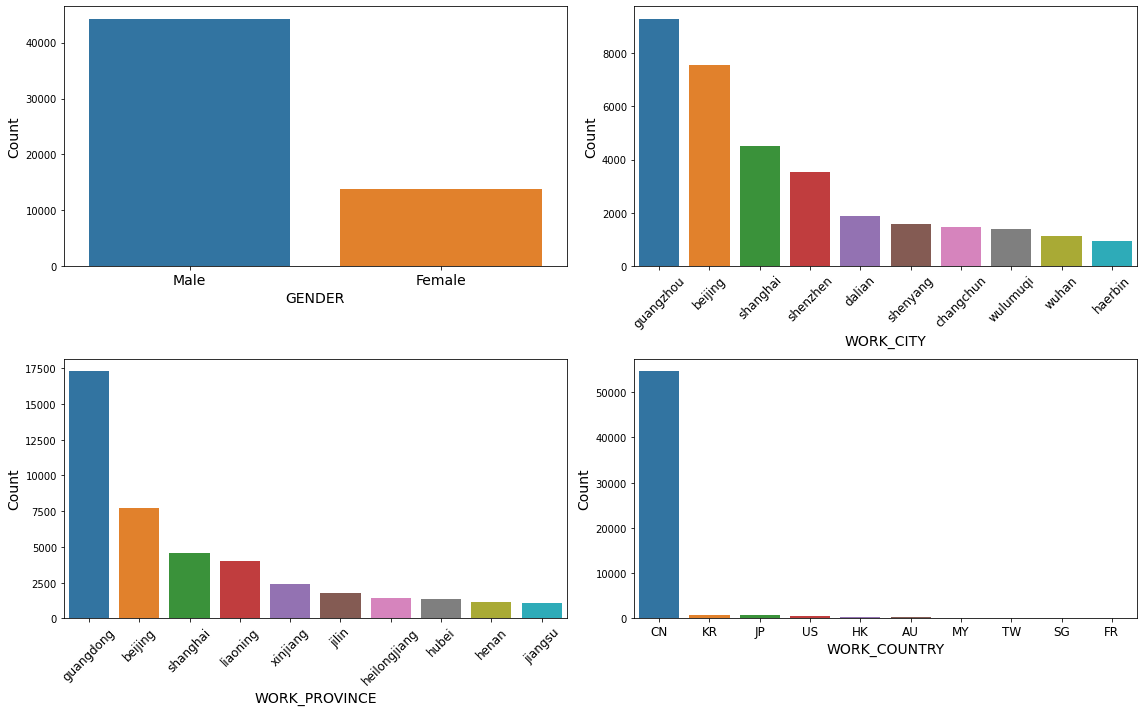

In [13]:
# Make figure and axes objects
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

# Countplot for gender
sns.countplot(x='GENDER',data=df_clean,ax=ax[0,0])
ax[0,0].tick_params(axis='x',labelsize=14)
ax[0,0].set_xlabel('GENDER',fontsize=14)
ax[0,0].set_ylabel('Count',fontsize=14)

# Barplot for work_city
work_city_top10 = df_clean['WORK_CITY'].value_counts().head(10)
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0,1])
ax[0,1].tick_params(axis='x', labelrotation= 45,labelsize=12)
ax[0,1].set_xlabel('WORK_CITY',fontsize=14)
ax[0,1].set_ylabel('Count',fontsize=14)

# Barplot for work_province
work_province_top10 = df_clean['WORK_PROVINCE'].value_counts().head(10)
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1,0])
ax[1,0].tick_params(axis='x', labelrotation= 45,labelsize=12)
ax[1,0].set_xlabel('WORK_PROVINCE',fontsize=14)
ax[1,0].set_ylabel('Count',fontsize=14)

# Barplot for work_country
work_country_top10 = df_clean['WORK_COUNTRY'].value_counts().head(10)
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[1,1])
ax[1,1].tick_params(axis='x', labelsize=12)
ax[1,1].set_xlabel('WORK_COUNTRY',fontsize=14)
ax[1,1].set_ylabel('Count',fontsize=14)

plt.tight_layout()

For the date column, I'm only interested in `FFP_DATE` because it tells us when the customer applied for membership.

In [14]:
# Convert to datetime object
ffp_date = pd.to_datetime(df_clean['FFP_DATE'])
# Get the year and month
ffp_date_year = ffp_date.dt.year
ffp_date_month = ffp_date.dt.month

Text(0.5, 0, 'FFP Date Month')

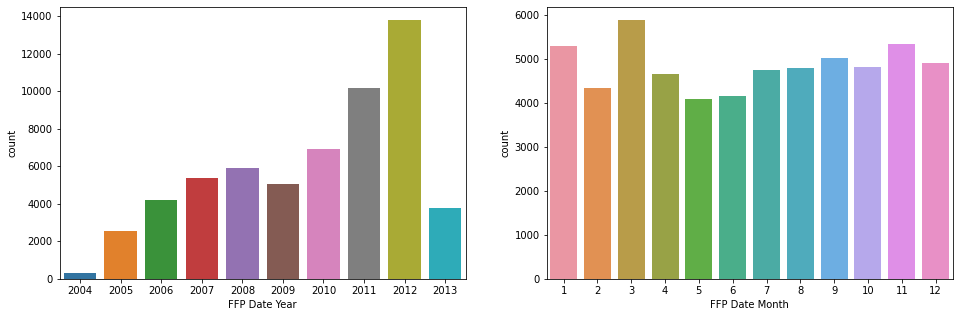

In [15]:
# Check the countplot
plt.figure(figsize=(16,5))

# Countplot for year
plt.subplot(1,2,1)
sns.countplot(x=ffp_date_year)
plt.xlabel('FFP Date Year')

plt.subplot(1,2,2)
sns.countplot(x=ffp_date_month)
plt.xlabel('FFP Date Month')

So most members in this dataset joined in the year 2012 and on March (not necessarily March 2012!).

### Univariate study: numerical columns

In [16]:
# Summary statistics
df_clean[num_cols].describe().T

count          mean           std         min  \
MEMBER_NO        58015.0  31543.143446  18188.454948    3.000000   
FFP_TIER         58015.0      4.105283      0.378903    4.000000   
AGE              58015.0     42.237732      9.758528    6.000000   
FLIGHT_COUNT     58015.0     12.098647     14.255693    2.000000   
BP_SUM           58015.0  11099.261794  16307.557912    0.000000   
SUM_YR_1         58015.0   5389.029785   8112.969216    0.000000   
SUM_YR_2         58015.0   5718.088132   8721.004495    0.000000   
SEG_KM_SUM       58015.0  17399.761820  20998.234082  368.000000   
LAST_TO_END      58015.0    170.985728    180.805454    1.000000   
AVG_INTERVAL     58015.0     67.675926     77.188375    0.000000   
MAX_INTERVAL     58015.0    167.145324    122.845373    0.000000   
EXCHANGE_COUNT   58015.0      0.329139      1.149120    0.000000   
avg_discount     58015.0      0.720939      0.183680    0.136017   
Points_Sum       58015.0  12778.652383  20634.496672    0.000000   
Point_NotFlight  58015.0      2.828044      7.510050    0.000000   

                          25%           50%           75%       max  
MEMBER_NO        15776.500000  31604.000000  47315.500000   62988.0  
FFP_TIER             4.000000      4.000000      4.000000       6.0  
AGE                 35.000000     41.000000     48.000000     110.0  
FLIGHT_COUNT         3.000000      7.000000     15.000000     213.0  
BP_SUM            2620.000000   5865.000000  13063.500000  505308.0  
SUM_YR_1          1024.000000   2831.000000   6619.000000  239560.0  
SUM_YR_2           866.500000   2865.000000   6993.000000  234188.0  
SEG_KM_SUM        4929.000000  10275.000000  21652.000000  580717.0  
LAST_TO_END         28.000000    103.000000    257.000000     731.0  
AVG_INTERVAL        23.644958     44.666667     81.750000     728.0  
MAX_INTERVAL        81.000000    144.000000    228.000000     728.0  
EXCHANGE_COUNT       0.000000      0.000000      0.000000      46.0  
avg_discount         0.612463      0.711619      0.808348       1.5  
Points_Sum        2885.000000   6517.000000  14574.000000  985572.0  
Point_NotFlight      0.000000      0.000000      1.000000     140.0

We can see that there are no negative values in every column, which makes sense. For the `AGE` column, we see that the oldest customer is 110 years old, and although that age is considered very old, it is still possible in terms of human lifespan. Moreover, in `SEG_KM_SUM`, the maximum values are much higher than the median value, so this is possibly an outlier.

In [17]:
# Check the oldest customer
df_clean[df_clean['AGE']==110]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
23268      20264  4/14/2005         5/18/2005  Female         4  shenzhenshi   

      WORK_PROVINCE WORK_COUNTRY    AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
23268     guangdong           CN  110.0  3/31/2014  ...    2888.0       14053   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
23268          4/6/2013          361     50.333333          214   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
23268               1      0.740881       11194                3  

[1 rows x 23 columns]

I have no further comments on this particular customer, and I decide to not drop this row as the other columns contain sensible values.

In [18]:
# Check the highest SEG_KM_SUM
df_clean[df_clean['SEG_KM_SUM']==df_clean['SEG_KM_SUM'].max()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6         .   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  

[1 rows x 23 columns]

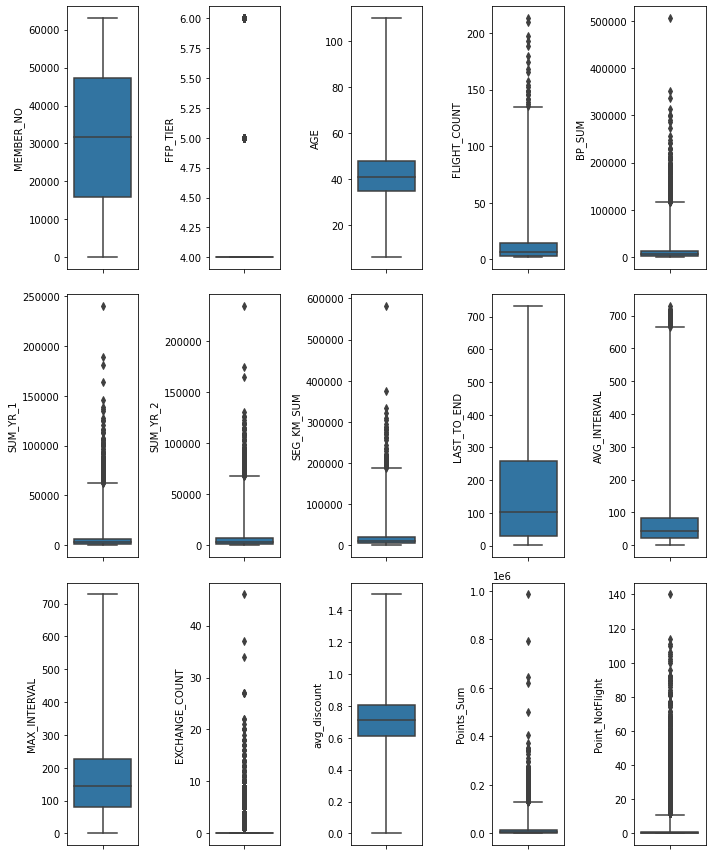

In [19]:
# Plot the distribution using boxplot
# Pick numerical columns
df_num = df_clean.select_dtypes(['int64','float64'])

plt.figure(figsize=(10,12))

for i, col in enumerate(df_num):
    plt.subplot(3,5,i+1)
    sns.boxplot(y=df[col],whis=10.)
    plt.tight_layout()

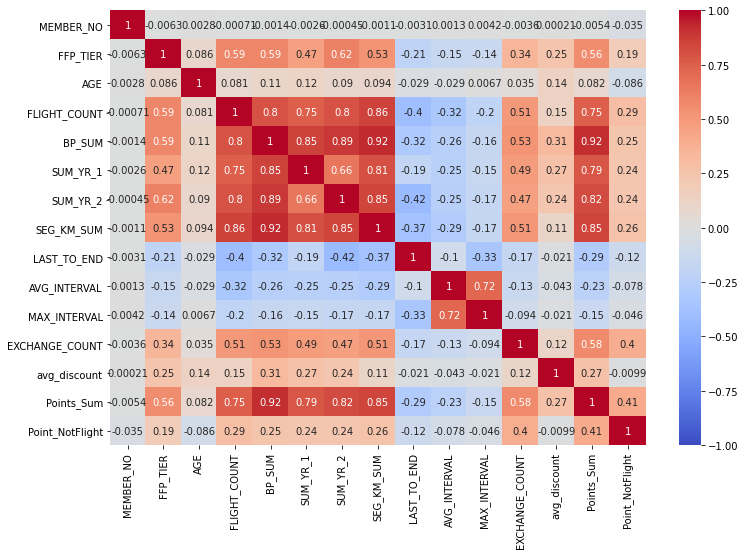

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean[num_cols].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

We see that the features that correlate the strongest with each other are `BP_SUM` and `SEG_KM_SUM`, and `BP_SUM` and `Points_Sum`. Since `BP_SUM` and `Points_Sum` are more or less the same, i.e. both indicate points, the correlation with `SEG_KM_SUM` implies that customers can gain more points mainly by having larger total mileage (flying to distant places).

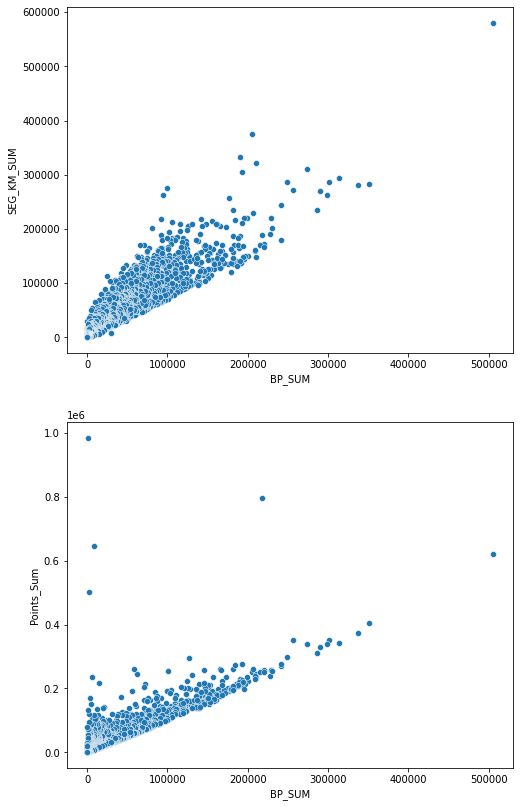

In [21]:
# Scatterplot to see the correlation more clearly
plt.figure(figsize=(8,14))
plt.subplot(2,1,1)
sns.scatterplot(x='BP_SUM',y='SEG_KM_SUM',data=df_clean)

plt.subplot(2,1,2)
sns.scatterplot(x='BP_SUM',y='Points_Sum',data=df_clean)

# 3. Features: LRFMC model

I am going to use the LRFMC model to segment the customers, where LRFMC stands for:
1. L (Loyalty): duration between the start of membership until the time the data were obtained.
2. R (Recency): duration between the last time the customer had a flight until the time the data were obtained.
3. F (Frequency): total number of flights within the observation window.
4. M (Monetary): total distance of flights within the observation window.
5. C (Cabin): average discount gained by the customer within the observation window. Generally, larger discount corresponds to higher class in flights.

In [22]:
# Ignore warnings
pd.options.mode.chained_assignment = None

# Convert date columns to datetime type
df_clean['LOAD_TIME'] = pd.to_datetime(df_clean['LOAD_TIME'])
df_clean['FFP_DATE'] = pd.to_datetime(df_clean['FFP_DATE'])

# Calculate L (difference between LOAD_TIME and FFP_DATE)
df_clean['L'] = (df_clean['LOAD_TIME']-df_clean['FFP_DATE']).astype('timedelta64[D]').astype(int)
# Get R (day since last flight)
df_clean['R'] = df_clean['LAST_TO_END']
# Get F (flight frequency)
df_clean['F'] = df_clean['FLIGHT_COUNT']
# Get M (total mileage)
df_clean['M'] = df_clean['SEG_KM_SUM']
# Get C (average discount)
df_clean['C'] = df_clean['avg_discount']

In [23]:
# Check the distribution
# Make a function to plot boxplot and histogram
def plot_lrfmc(df,feature,axis_label):
    # Plot style
    sns.set(style="ticks")

    # Feature to be plotted
    x = df[feature].values

    # Define figure and axes objects
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)},figsize=(8,6))

    # Plot boxplot and histogram
    sns.boxplot(x=x, ax=ax_box)
    sns.histplot(x=x, ax=ax_hist,kde=True)

    # Delete boxplot ticks
    ax_box.set(yticks=[])
    # Delete some frames of the figure
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    # Label for x axis
    plt.xlabel(axis_label,fontsize=20)
    return

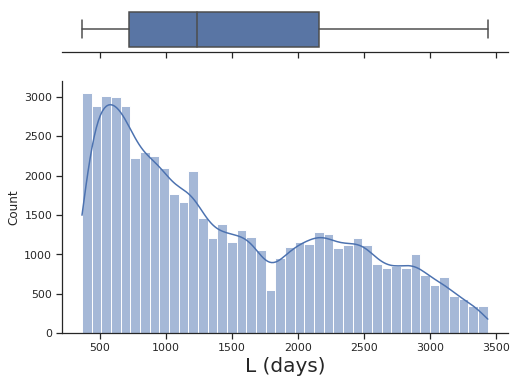

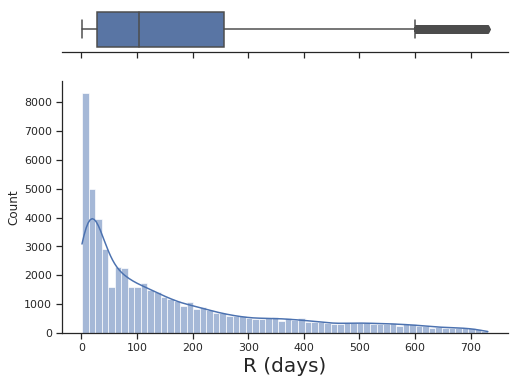

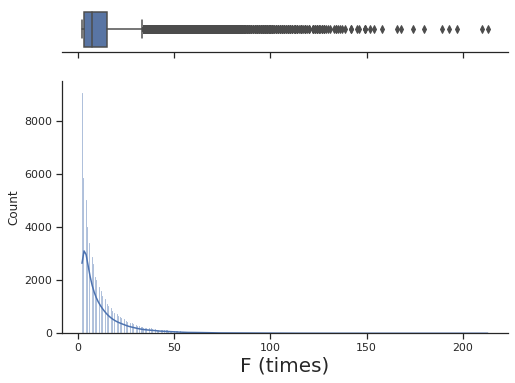

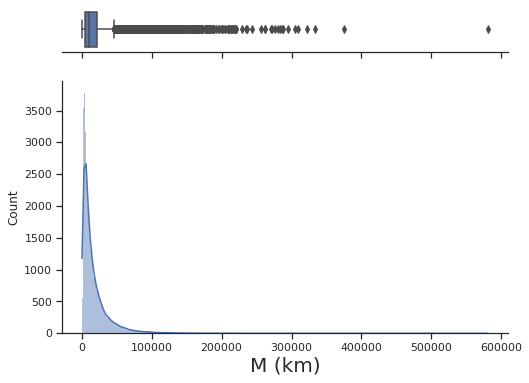

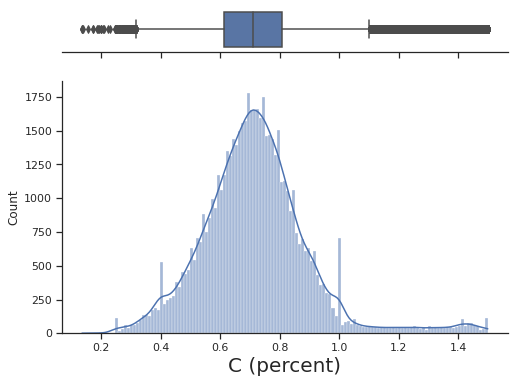

In [24]:
# Distribution of L
plot_lrfmc(df_clean,'L','L (days)')

# Distribution of R
plot_lrfmc(df_clean,'R','R (days)')

# Distribution of F
plot_lrfmc(df_clean,'F','F (times)')

# Distribution of M
plot_lrfmc(df_clean,'M','M (km)')

# Distribution of C
plot_lrfmc(df_clean,'C','C (percent)')

It appears that only `C` follows a normal distribution, whereas the other features are very positively-skewed and contain a lot of outliers. We will handle these later.

In [25]:
# Store all of the relevant features (LRFMC) into a new dataframe
df_lrfmc = df_clean[['L','R','F','M','C',]]

# Top 5 rows
df_lrfmc

L    R    F       M         C
0      2706    1  210  580717  0.961639
2      2615   11  135  283712  1.254676
3      2047   97   23  281336  1.090870
4      1816    5  152  309928  0.970658
5      2241   79   92  294585  0.967692
...     ...  ...  ...     ...       ...
62971   412  360    2    1096  0.250000
62972  1172  180    2    1914  0.140000
62973   367  357    2     760  0.350000
62976  1362   39    2    1062  0.225000
62978  1082  282    2     760  0.280000

[58015 rows x 5 columns]

### Multivariate study

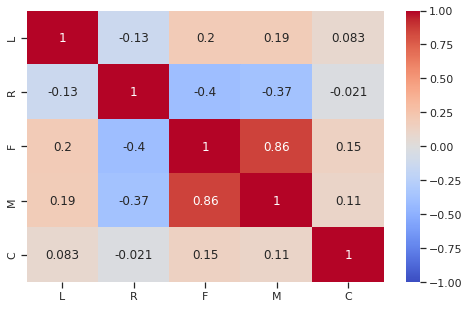

In [26]:
# Create correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_lrfmc.corr(),annot=True,cmap='coolwarm',vmin=-1.,vmax=1.)

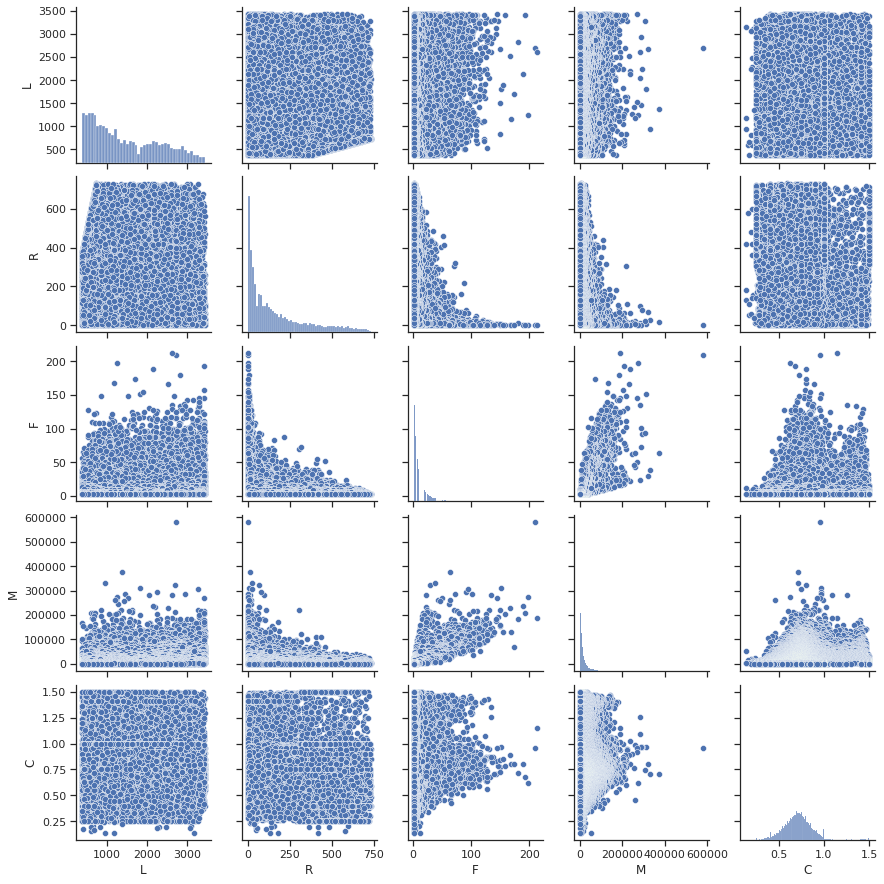

In [27]:
# Create pairplot
sns.pairplot(df_lrfmc)

As can be seen above, there is a strong correlation between `F` and `M`, which is to be expected since the more frequent a customer flies, the larger the total distance covered by the flights.

In addition, there is a negative correlation between `R` and the other features, most notably with `F`, which indicates that customers with least amount of total flights tend to rarely fly.

# 4. Customer Segmentation with K-Means

### Transforming the Features

In K-means segmentation, it is very desirable that the distribution of the features approximately follow normal distribution, so that the positions of the centroid of each cluster will not be biased. However, as can be seen from the distribution of the features above, only `C` approximately follow a normal distribution, and the other features are positively skewed. Specifically for `F` and `M`, the distribution are so skewed that there are a lot of outliers. To handle this skewness, I am going to transform `F` and `M` into logarithmic units.

In [28]:
# Transform to logarithmic units
df_lrfmc['F'] = np.log10(df_lrfmc['F'])
df_lrfmc['M'] = np.log10(df_lrfmc['M'])

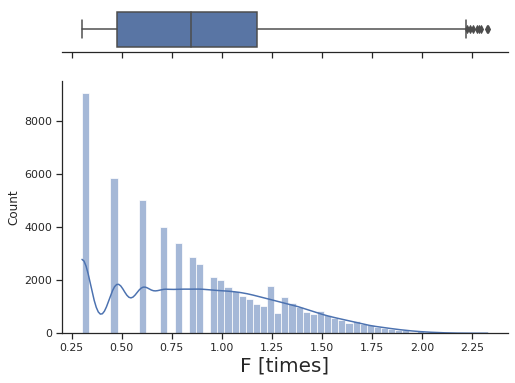

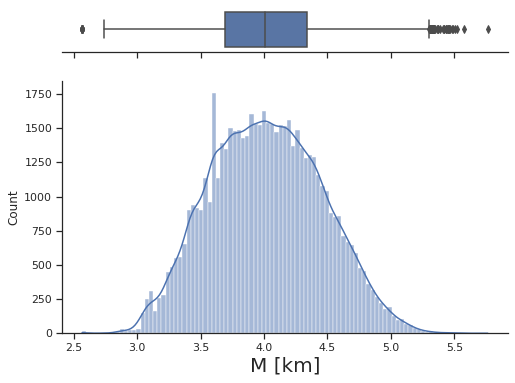

In [29]:
# Check the distribution again
plot_lrfmc(df_lrfmc,'F','F [times]')

plot_lrfmc(df_lrfmc,'M','M [km]')

The distribution of `M` is now very Gaussian, but the same cannot be said for `F`. But all in all, we have greatly reduced the number of outliers. As for `C`, the outliers shown by the boxplot are still within 5xIQR, and so are not significant.

### Scale the Features

I will standardize the features to ensure that all variables have the same scale, i.e. forcing each feature to have a mean of 0 and a variance of 1.

In [30]:
# Import standardscaler
from sklearn.preprocessing import StandardScaler

# Create an instance for the scaler
scaler = StandardScaler()
# Standardize the LRFMC
scaler.fit(df_lrfmc)
lrfmc_std = scaler.transform(df_lrfmc)

# Check top 5 rows
df_lrfmc_std = pd.DataFrame(data=lrfmc_std,columns=['L','R','F','M','C'])
df_lrfmc_std.head()

L         R         F         M         C
0  1.479608 -0.940166  3.500014  3.965204  1.310440
1  1.371316 -0.884858  3.035801  3.258224  2.905815
2  0.695388 -0.409204  1.176379  3.249924  2.014008
3  0.420495 -0.918043  3.160415  3.345454  1.359541
4  0.926251 -0.508760  2.632891  3.295343  1.343397

### Finding the Optimal Number of Clusters

I will use the elbow method and the silhouette score to determine the optimal number of clusters in the dataset.

In [31]:
# Import K-means
from sklearn.cluster import KMeans

# Create an empty list for the inertias (WSCC)
inertia = []

# Range of k to be tested
k_values = range(2,11)

# Try different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_lrfmc_std)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

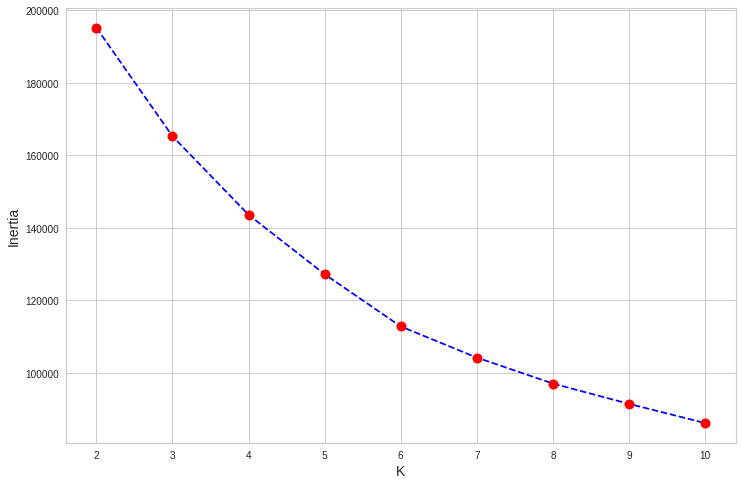

In [32]:
# Import elbow visualizer from yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Plot inertia vs k values using yellowbrick
plt.figure(figsize=(12, 8))

plt.plot(k_values,inertia,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K',fontsize=14)
plt.ylabel('Inertia',fontsize=14)

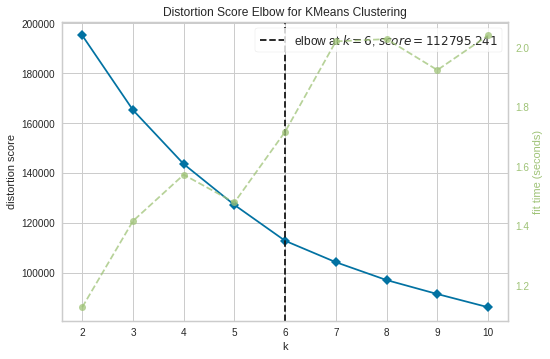

In [33]:
# We can also use yellowbrick to visualize inertia vs k
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='distortion', timings=True, locate_elbow=True
)

visualizer.fit(df_lrfmc_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Let's discuss the theory behind the elbow method. The plot above shows the inertia (or distortion) score as a function of k. The inertia is also called the within-cluster sum of squares (WCSS). Given a set of point ($\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_n$) with a mean value of $\mathbf{\mu}_i$ in a cluster $\mathbf{C}_i$, the WCSS is defined as

$$\sum_{\mathbf{x}\in \mathbf{C}_i} || \mathbf{x}_i - \mathbf{\mu}_i ||^2$$

The inertia for a given value of k is then simply the sum of the WCSS of all clusters. As can be seen from the equation, it is analogous to the mean-squared error in regression analysis, and so we want to minimize this value. However, there is also a problem of overfitting. If we plot the inertia vs k, for cases where the clusters are well-separated, we will see a point after which the value of the inertia decreases linearly or even constant. After this point, we don't gain much information, albeit the inertia is still decreasing. This point is called the elbow point and it locates the optimal value of k.

For our case above, it seems that the elbow point is located at k=6. However, as you might already notice, one weakness of this method is that it is quite subjective, especially if the clusters are not well-separated (which seems to be our case).

Let's try finding K using another method: the silhouette score. 

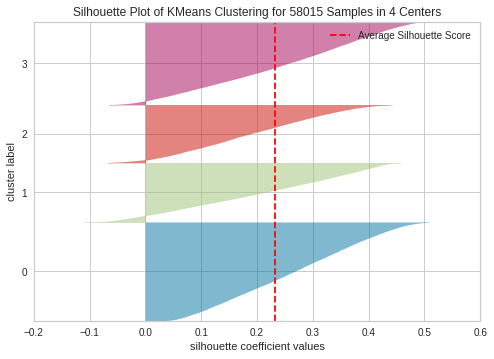

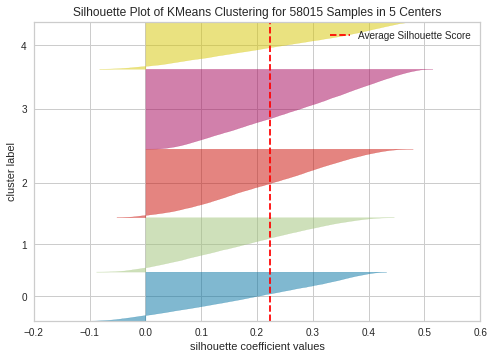

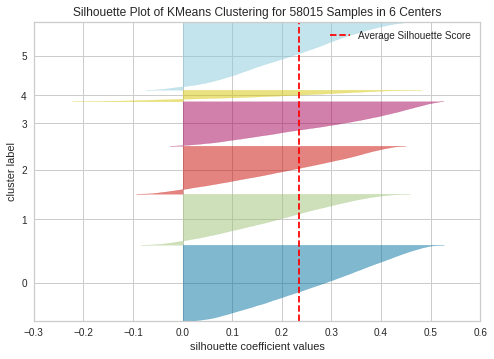

In [34]:
# Use yellowbrick to create silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
for i in [4,5,6]:
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # Fit the data to the visualizer
    visualizer.fit(df_lrfmc_std)        
    visualizer.show()

Let's briefly discuss what the silhouette score is. For a given point $i$, the silhouette score of that point is defined by

$$ \mathrm{Si} (i) = \frac{b(i)-a(i)}{\mathrm{max}(a(i),b(i))}$$,

where $a(i)$, sometimes called the cohesion, is the mean of the distance between point $i$ and every other point in the same cluster (intra-cluster distance). If $a$ is small, then the cluster size is small, implying they are bound together very strongly.

In other hand, $b(i)$, sometimes called the separation, is the mean of the distance between point $i$ and all points belonging to the nearest cluster to the cluster where $i$ belongs (nearest-cluster distance). If $b$ is large, then the cluster where $i$ belongs and the nearest-neighboring cluster are far apart, implying the clusters are well-separated.

By the definition above, we can consider two extreme cases: 
- If $b \gg a$, the score is $\sim +1$, and the nearest cluster is much more distant than the cluster size, indicating the two clusters are very separated. 
- If $a \gg b$, the score is $\sim -1$, and the cluster size is much larger than the distance to the nearest-neighboring cluster, indicating the two clusters are mixed together.

Therefore, the silhouette score falls between the range of [-1,1]. A score close to +1 indicates the sample is far from the nearest neighboring cluster, which is good. And a value close to -1 indicates the sample may be incorrectly assigned to the wrong cluster, which is bad.

The plot above show the silhouette score for each point in the cluster in increasing order. The horizontal axis gives the silhouette coefficient (or silhouette score). The vertical axis gives the cluster member. In other words, the thickness indicates how many members there are in each cluster. The dashed vertical red line indicates the average silhouette score of all points in the dataset.

To determine the best value of k, we have to consider two factors. First, we want the average silhouette coefficient to be as large as possible, while still being smaller than the maximum score of every cluster member, i.e. they are inside the colored triangles. Second, we also want the thickness of each cluster to be similar to each other, indicating similar composition in every cluster.

From the two considerations above, it looks like k = 5 is the most optimal number of clusters, since the average score is still inside the silhouette plots and the thickness are similar for every cluster. However, we have to consider the average silhouette score. Let's plot the average score as a function of k, similar to the elbow method above (the elbow method uses inertia/distortion as its y-value).

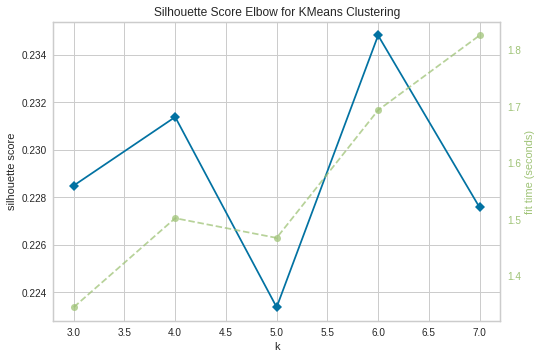

In [35]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(3,8), metric='silhouette', timings=True, locate_elbow=False
)

visualizer.fit(df_lrfmc_std)        # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure

The highest score is achieved at k=6, which is higher than the score at k=5. The fact that k=6 captures an additional cluster with very few members, i.e. cluster 4 in the silhouette plot above, may indicate there is a group of outlying customers. Therefore, we will use k=6 as our benchmark model, and we will analyze the characteristics of each cluster later on.

Another remark, the fact that the maximum score is only around +0.23 indicates the clusters are mixed together, and the separation is not clear at all. This is expected since there is no sign of multimodality in any of the LRFMC features (except maybe for `L` and `C`). We can visualize the clustering by reducing the dimension of the data into just 2-dimension using PCA.

In [36]:
from sklearn.decomposition import PCA

# Visualize the segmentation along 2 principal axes (using PCA)
def plot_clusters(df, k_value):
    kmeans = KMeans(n_clusters=k_value,random_state=7)
    kmeans.fit(df)
    
    # Visualization with PCA
    pca = PCA(n_components=2)
    pca.fit(df)
    pcs = pca.transform(df)

    # Store to a new dataframe
    df_lrfmc_pca = pd.DataFrame(data=pcs,columns=['PC1','PC2'])
    df_lrfmc_pca['cluster'] = kmeans.labels_
    
    # Visualization
    plt.figure(figsize=(10,6))

    # Color for each cluster
    color_list = ['red','blue','green','orange','purple','pink']
    color_list = color_list[:k_value]
    
    for i in range(len(df_lrfmc_pca['cluster'].unique())):
        df_dummy = df_lrfmc_pca[df_lrfmc_pca['cluster']==i]
        plt.scatter(df_dummy['PC1'],df_dummy['PC2'],c=color_list[i],s=5,label=f'Cluster {i}')
        # Centroid positions
        plt.scatter(df_dummy['PC1'].mean(),df_dummy['PC2'].mean(),c=color_list[i],marker='X',edgecolor='k',s=250,zorder=10)

    plt.legend()
    plt.title(f'Segmentation for {k_value} clusters')
    plt.xlabel('PC1',fontsize=14)
    plt.ylabel('PC2',fontsize=14)

    return

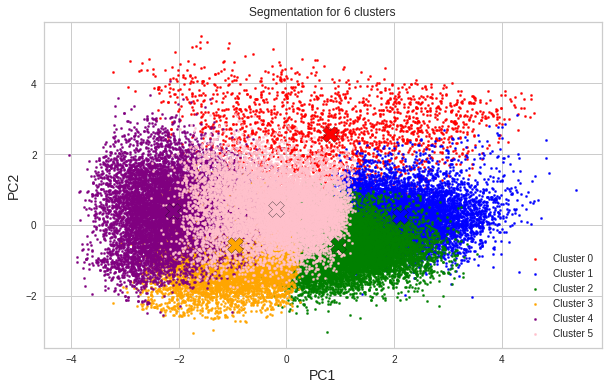

In [37]:
# Visualization for 5 clusters
plot_clusters(df_lrfmc_std,6)

The clusters are mixed together, as expected.

# 5. Cluster Analysis

We will use the median values of the LRFMC features of every cluster, because these represent the clusters the most. We will start by making a 'snake plot' for the case k=6.

In [38]:
# Using k=6 and save the labels
kmeans = KMeans(n_clusters=6,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

In [39]:
# Create a function to plot median LRFMC
def snake_plot(df_lrfmc_std, n_clusters):
    
    # Create segmentation
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(df_lrfmc_std)
    df_labels = pd.DataFrame(kmeans.labels_,columns=['cluster'])
    df_clusters = df_lrfmc_std.join(df_labels)
    
    # Create summary dataframe
    lrfmc_summary = df_clusters.groupby(['cluster']).agg(num_members=('cluster','size'),
                                                  median_L=('L','median'),
                                                  median_R=('R','median'),
                                                  median_F=('F','median'),
                                                  median_M=('M','median'),
                                                  median_C=('C','median')).reset_index()
    
    # Melt dataframe into long format
    df_melt = pd.melt(lrfmc_summary.reset_index(), 
                            id_vars=['cluster'],
                            value_vars=['median_L', 'median_R', 'median_F','median_M','median_C'], 
                            var_name='Metric', 
                            value_name='Value')

    plt.figure()
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')
    
    return

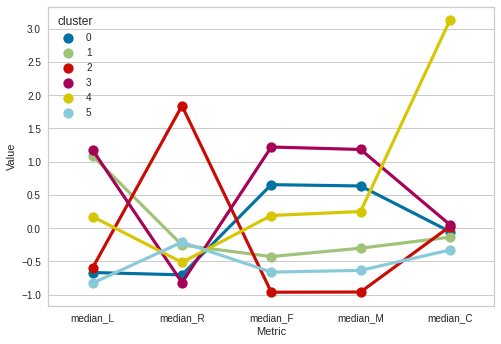

In [40]:
# For k=6
snake_plot(df_lrfmc_std,6)

Ideally, a good segmentation model will have unique LRFMC values for every cluster. In the snake plot above, we can see that the values are generally different for every cluster. The customer segmentation for the LRFMC metric are as the following: 
- For `L`, the customers are divided into three groups: long-time members, intermediate-time members, and recent members. 
- For `R`, the customers are divided into two groups: those who flew very recently and customers who have not flown for a while. 
- For `F` and `M`, the customers are divided into 5 groups, and so they are unique for every cluster. 
- Finally, for `C`, the customers are divided into 2 groups: those with high and those with low average discount.

We can also see how many members there are in each cluster.

cluster  member
0        0   14756
1        5   13180
2        1    9902
3        2    9319
4        3    8633
5        4    2225

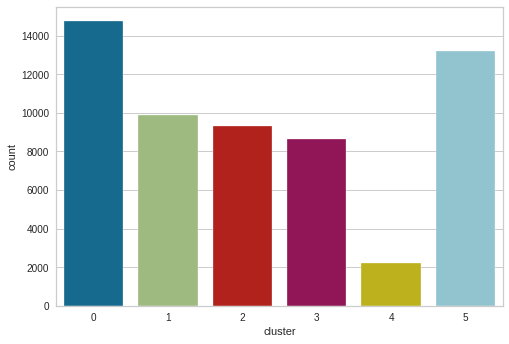

In [41]:
##### Check cluster composition
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

Cluster 0 has the most member, followed by cluster 5, 1, 2, 3, and 4.

We can also be fancy and use `plotly` to make a radar chart.

### Radar Chart

In [42]:
# Radar chart using plotly
import plotly.graph_objects as go

# List of feature name
categories = ['L','R','F','M','C']

fig = go.Figure()

# Create summary statistics using the standardized LRFMC
# Since plotly still has not supported varying radial scales
lrfmc_summary = df_clusters.groupby(['cluster']).agg(mean_L=('L','median'),
                                  mean_R=('R','median'),
                                  mean_F=('F','median'),
                                  mean_M=('M','median'),
                                  mean_C=('C','median'))

# Make radar chart for every cluster
for i in range(len(lrfmc_summary)):
    fig.add_trace(go.Scatterpolar(
          r=lrfmc_summary.loc[i].values,
          theta=categories,
          fill='toself',
          name=f'Cluster {i}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
)

fig.show()

Customer Profiles (ordered by cluster members):

- Cluster 0 contains 14756 members. This cluster is characterized by low `L`, low `R`, moderately high `F` and `M`, and low `C`. The customers in this cluster are recent members that frequently use our airline service. These are our most potential customers, and we want to gradually increase their satisfaction level so they become our loyal customers. Perhaps we can encourage these customers to using our service more frequently and increase their satisfaction and loyalty by giving extra discounts or exchanging a certain mileage count with a free ticket.

- Cluster 5 contains 13180 members. This cluster is characterized by low `L`, low `R`, low `F` and `M`, and low `C`. The customers in this cluster are recent members that rarely use our airline service. Since they just recently joined, their status is still uncertain, and we might need to wait to observe the development of the customers in this cluster. Maybe we can encourage them to using our service more by increasing their discount price, since their average is already low.

- Cluster 1 contains 9902 members. This cluster is characterized by high `L`, moderately low `R`, average `F` and `M`, and normal `C`. The customers in this cluster are long-time members that only use our service from time to time, and so they are low-value customers. Ideally, we want to encourage these customers to using our service more frequently, but the effort may not worth the outcome.

- Cluster 2 contains 9319 members. This cluster is characterized by low `L`, very high `R`, very low `F` and `M`, and low `C`. The customers in this cluster have churned, since they have not used our airline service for a long time, and so they are also low-value customers. Ideally, we want to attract these customers back to using our service, but the effort also may not worth the outcome.

- Cluster 3 contains 8633 members. This cluster is characterized by high `L`, very low `R`, very high `F` and `M`, and normal `C`. The customers in this cluster are long-time members that very frequently use our service, and so they are our ideal customers (high-value customers). We want to retain their loyalty, and perhaps we can do that by giving extra service during flights, such as free food and beverages, warm towel, souvenirs, or extra discounts for higher class seats.

- Cluster 4 contains 2225 members, the fewest among the other clusters. One very distinct feature of this cluster is its very high value of `C`. According to [this article](https://pythonmana.com/2021/12/202112130116081138.html) and [Wang and Chen (2022)](https://www.ijres.org/papers/Volume-10/Issue-4/Ser-5/B10040513.pdf), higher discount generally corresponds to higher class in flights (e.g. first/business class). If that is true, then these customers are members who frequently use the higher class when flying, and we can create a VIP membership for them. We can also use differentiated management and one-to-one marketing for these customers.


Recommendations:

- Based on the segmentation above, we can implement different levels of membership. You may notice that in the original dataset, there is already a column specifying the membership tier (`FFP_TIER`). However, it only contains 3 unique values. According to our results, we need more levels of membership, such as VIP, Diamond, Platinum, Gold, Silver, and ordinary member, and each level will have different benefits. For example, the highest level will get the highest discount, free food and beverages, and a free ticket after a certain mileage or flight count. The second highest level will get less discount, only beverages, and a free ticket after a larger mileage or higher flight count, and so on.
- In order to obtain the higher level membership, customer must gather certain points which can be redeemed from flight count or mileage gathered. These points will expire after a certain period to push customer consumption as much as possible. You may also have noticed that this dataset contains points-related columns, such as `Points_Sum`. However, since we don't know the exact mechanism of this point system that has already been implemented, we will give this recommendation anyway.
- Differentiated management or one-to-one marketing might be necessary for the potential customers, especially for cluster 4 customers, so that the customers will feel a sense of belonging to our company. 
- We can also give reminders and promotions for customers whose points are close to the threshold before their points expire in order to avoid dissatisfaction.
- It would be especially interesting to hear the feedback from the churned customers. We can spread questionnaire randomly to these customers to get them, although there might not be a lot of responses. Ultimately, we may need to just stop giving discount or promotion to the low-value customers (cluster 1 and 2) to cut our spending cost.

# 6. Clustering Using k=5 and k=7

We have created and analyzed a customer segmentation with k=6. We should also investigate the case if we use other values for k, which should answer the questions "what information do we lose by omitting 1 less cluster? what information do we gain by adding 1 more cluster?". So next, I am going to analyze the case for k=5 and k=7.

cluster  member
0        3   15510
1        2   13303
2        1   10560
3        0    9537
4        4    9105

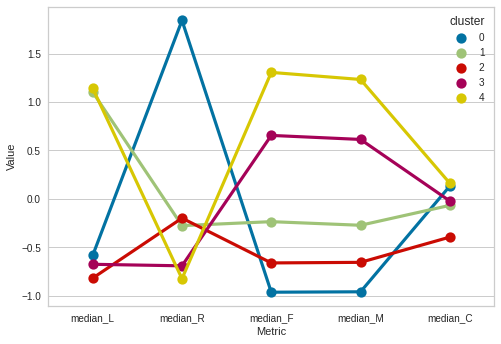

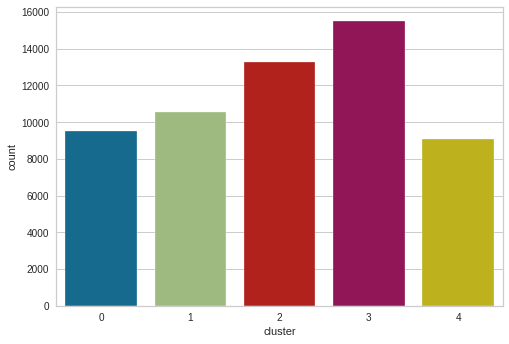

In [43]:
# For k = 5
snake_plot(df_lrfmc_std,5)

# Using k=5 and save the labels
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

##### Check cluster composition
plt.figure()
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

cluster  member
0        2   14134
1        0    9346
2        4    8687
3        3    8271
4        1    8138
5        6    7498
6        5    1941

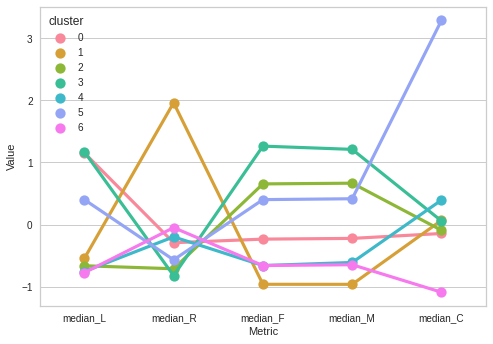

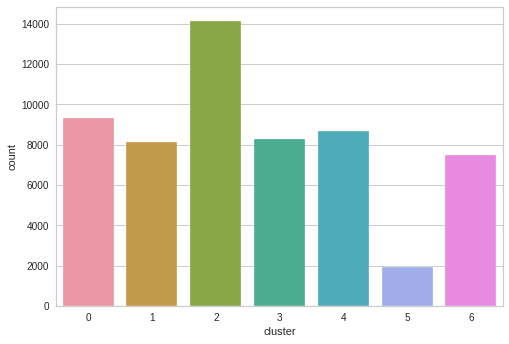

In [44]:
# For k = 7
snake_plot(df_lrfmc_std,7)

# Using k=7 and save the labels
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

##### Check cluster composition
plt.figure()
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

__Analysis for k=5__:

Looking at the snake plot above, we can readily notice some similarities with our benchmark model (k=6), and the most obvious difference is the omittance of cluster with high `C` (cluster 4 in our benchmark model), which is merged to the other 5 clusters. Therefore, by omitting 1 cluster from our benchmark model, we lose our potential VIP customers, and thus this model may not be optimal to use.

__Analysis for k=7__:

By including 1 additional cluster, we notice cluster 6 in this model, where the customers have much lower value for `C`. However, the other LRFM features of this cluster is more or less the same with cluster 4, indicating redundancy. Therefore, adding another cluster does not significantly improve our customer segmentation.

# 7. Conclusions

- We use the Airline Customer dataset from Kaggle to create a customer segmentation model.
- Most of the members in this airline company come from Guangzhou, China, and joined in the year 2012.
- We use the LRFMC model: loyalty, recency, frequency, monetary, and cabin as features, following previous work on airline dataset.
- Using the K-means algorithm for the clustering algorithm, and determining the optimal value of k using the elbow method in combination with the silhouette score, we find that k=6 gives the best customer segmentation.
- In this benchmark model, the typical `F` and `M` values are unique for each cluster, and so we can implement membership levels with increasing benefits to push customer consumption and increase their loyalty.
- We also try using k=5 and k=7 to see what information we gain/loose. With 5 clusters only, we lose our potential VIP customers. In the other hand, adding an additional cluster does not improve our segmentation model.

# 8. References

- RFM Segmentation in E-Commerce: https://towardsdatascience.com/rfm-segmentation-in-e-commerce-e0209ce8fcf6 by Pararawendy Indarjo (Towards Data Science).
- RFM Model for Customer Value of Air Company: https://www.kaggle.com/code/vinzzhang/rfm-model-for-customer-value-of-air-company/data?select=air_data.csv by Vincent Zhang (Kaggle).
- Customer modeling and analysis of civil aviation industry based on Python data analysis: https://pythonmana.com/2021/12/202112130116081138.html by user Mr. thirteen Po (pythonmana).
- KMeans Silhouette Score Explained With Python Example: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=The%20silhouette%20plots%20can%20be,thickness%20of%20the%20silhouette%20plot. by Ajitesh Kumar (DZone).
- Chen, T. & Wang, P. (2022). IJRES vol. 10 issue 4 pp. 05-13.
- Tao, Y. (2020). ICPCSEE 2020. Communications in Computer and Information Science, vol 1257. Springer, Singapore. https://doi.org/10.1007/978-981-15-7981-3_7